<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/cnn/fashion_mnist_cnn_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>








*CNN 실습할 때는 GPU를 설정하고 하세요.**

# 1.데이터 가져오기

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# keras의 데이터셋의 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분
(train_images, train_labels), (test_images, test_labels) =

# 2.데이터 전처리

*   합성곱 신경망 모델은 (데이터 인스턴스의 수, 데이터의 행 수, 데이터의 열 수, 채널 수)의 형태로 입력을 받아야 하는데, 우리가 가진 패션 MNIST 데이터는 회색조 이미지이므로 Red, Green Blue의 채널 정보가 없다.
* 따라서 채널의 수를 1로 하여 (데이터 인스턴스의 수, 데이터의 행 수, 데이터의 열 수, 1)로 변형하면 된다  넘파이의 newaxis를 활용


In [ ]:
print(train_images.shape)
print(test_images.shape)
train_images =
test_images =
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# 데이터 정규화
train_images, test_images =

# 3.모델 만들기

#### (1) 모델 구성(CNN)

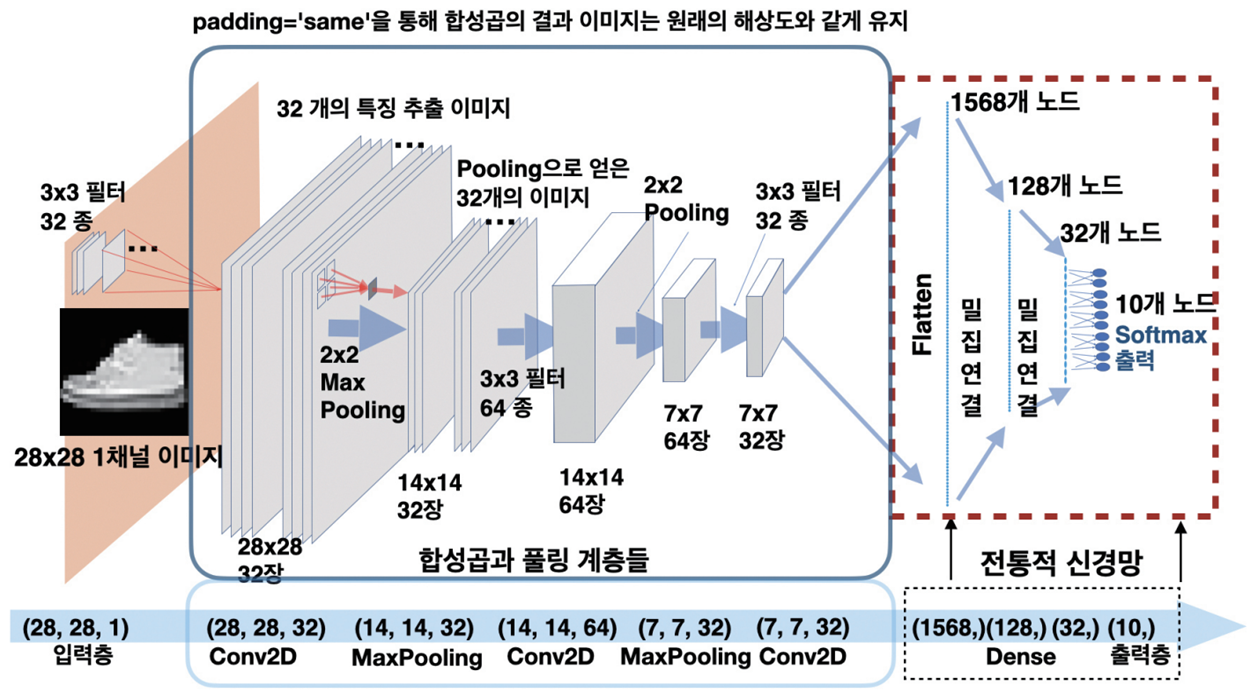

In [ ]:
model = keras.models.Sequential( [

])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 1568)              0

#### (2) 학습 과정 설정

## (3)학습: 25% 데이터로 교차검증

교차검증 : 고정된 테스트데이터에 지나치게 과적합되는 것을 방지하기 위해 전체 데이터를 K개의 그룹으로 나누어 K번 훈련을 반복하는 방법

`model.fit(train_images,train_labels,epochs=10,validation_split=0.25)`


In [ ]:
# validation_split=0.25 ==> 25% 검증 데이터로 교차검증

history =

Epoch 1/5
1407/1407 [==============================] - 13s 6ms/step - loss: 0.4530 - acc: 0.8380 - val_loss: 0.3435 - val_acc: 0.8743
Epoch 2/5
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2961 - acc: 0.8906 - val_loss: 0.2804 - val_acc: 0.8953
Epoch 3/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2538 - acc: 0.9052 - val_loss: 0.2787 - val_acc: 0.8965
Epoch 4/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2199 - acc: 0.9187 - val_loss: 0.2560 - val_acc: 0.9084
Epoch 5/5
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1909 - acc: 0.9288 - val_loss: 0.2512 - val_acc: 0.9123


#### (4) 학습 결과 시각화

{'loss': [0.4530046582221985,
  0.2961273789405823,
  0.2537536025047302,
  0.21987730264663696,
  0.1909024715423584],
 'acc': [0.8380222320556641,
  0.8906000256538391,
  0.9052222371101379,
  0.918666660785675,
  0.9287999868392944],
 'val_loss': [0.34346210956573486,
  0.28038135170936584,
  0.2786775827407837,
  0.25596487522125244,
  0.2512417137622833],
 'val_acc': [0.8743333220481873,
  0.8953333497047424,
  0.8965333104133606,
  0.9083999991416931,
  0.9122666716575623]}

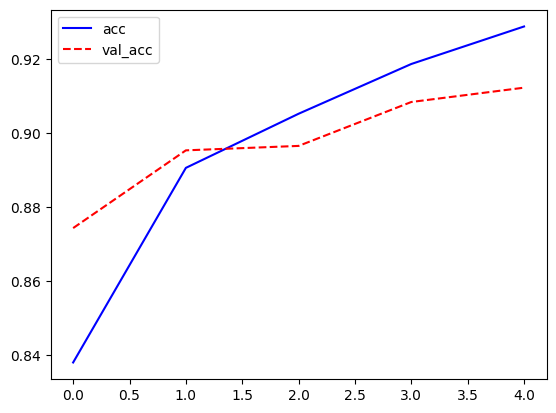

#### (5) 모델 평가

In [ ]:
test_loss, test_acc =
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.2629 - acc: 0.9096 - 1s/epoch - 3ms/step
테스트 정확도: 0.909600019454956


최초 이미지부터 25개의 이미지를 모델에 넣어서 예측해 보고 정답 레이블과 비교해보기

In [ ]:


print('실제값 =', test_labels[:25])
print('예측값 =', y_hat)

1/1 [==============================] - 0s 255ms/step
실제값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]
예측값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 5 1]


합성곱 신경망 모델의 결과를 시각화해보기

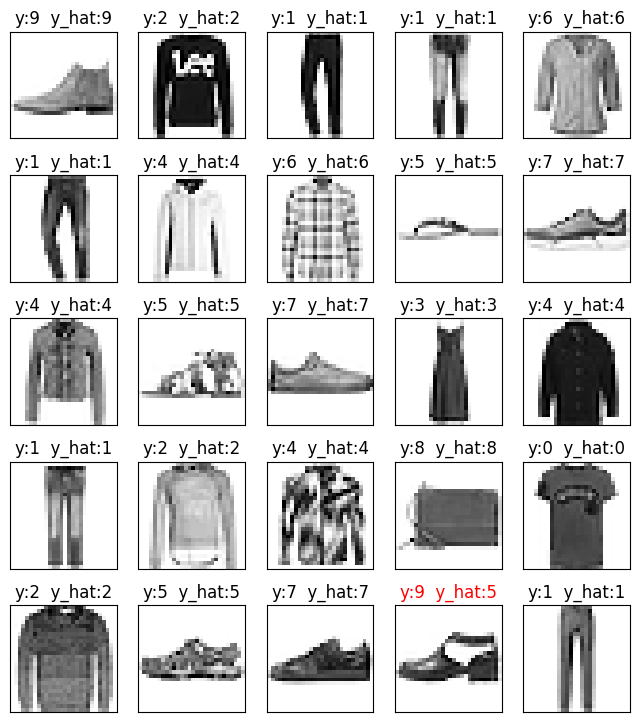

In [ ]:
plt.figure(figsize=(8,9))


#### (6) 혼동행렬 살펴보기

: 육안으로 보아도 판별하기 어려운 데이터에 분류가 실패하였음을 확인할 수 있다. 혼동행렬을 통해 어떤 경우에 잘못된 판별이 만았는지 확인해보자. 가장 많은 오류는 T-shirts를 Shirts로 판별한 경우, 가장 정확하게 판단을 못하는 항목은 Shirts였음을 알 수 있다.

313/313 [==============================] - 1s 2ms/step


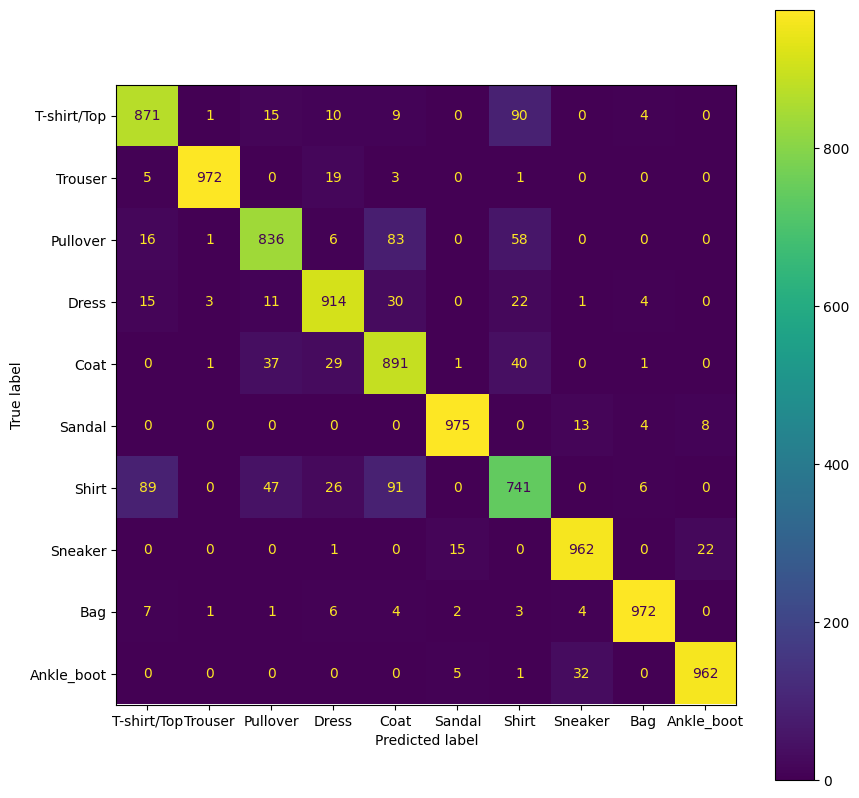

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fashion_class = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']



# 4. 모델 성능 개선

#### (1) 드롭아웃 : 희석화

In [ ]:
model = keras.models.Sequential( [

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)         

In [ ]:
model.compile()
hist = model.fit()

Epoch 1/10
1407/1407 [==============================] - 11s 6ms/step - loss: 0.5036 - accuracy: 0.8172 - val_loss: 0.3472 - val_accuracy: 0.8722
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3417 - accuracy: 0.8744 - val_loss: 0.3291 - val_accuracy: 0.8811
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2986 - accuracy: 0.8907 - val_loss: 0.2804 - val_accuracy: 0.8980
Epoch 4/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2716 - accuracy: 0.9000 - val_loss: 0.2676 - val_accuracy: 0.9025
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2489 - accuracy: 0.9094 - val_loss: 0.2649 - val_accuracy: 0.9042
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2314 - accuracy: 0.9142 - val_loss: 0.2686 - val_accuracy: 0.8991
Epoch 7/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2192 - accuracy: 0.9190 - val_loss: 0.2570 - val_accuracy

In [ ]:
test_loss, test_acc =
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.2836 - accuracy: 0.9123 - 649ms/epoch - 2ms/step
테스트 정확도: 0.9122999906539917
